In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

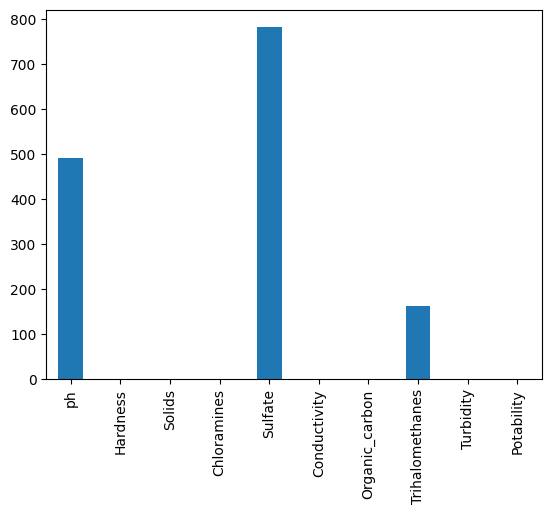

In [7]:
df.isna().sum().plot(kind="bar")
plt.show()

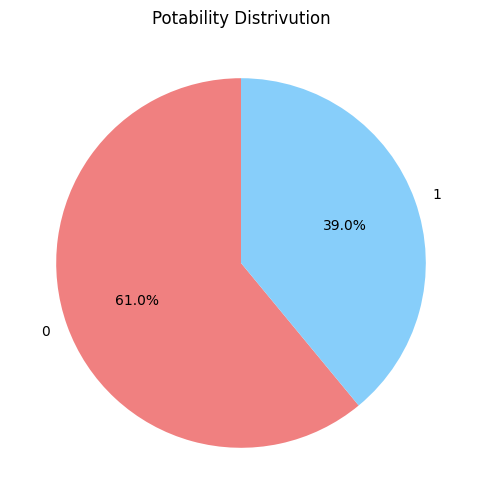

In [18]:
Potability = df['Potability'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Potability, labels=Potability.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Potability Distrivution')
plt.show()

### Analyze ph column

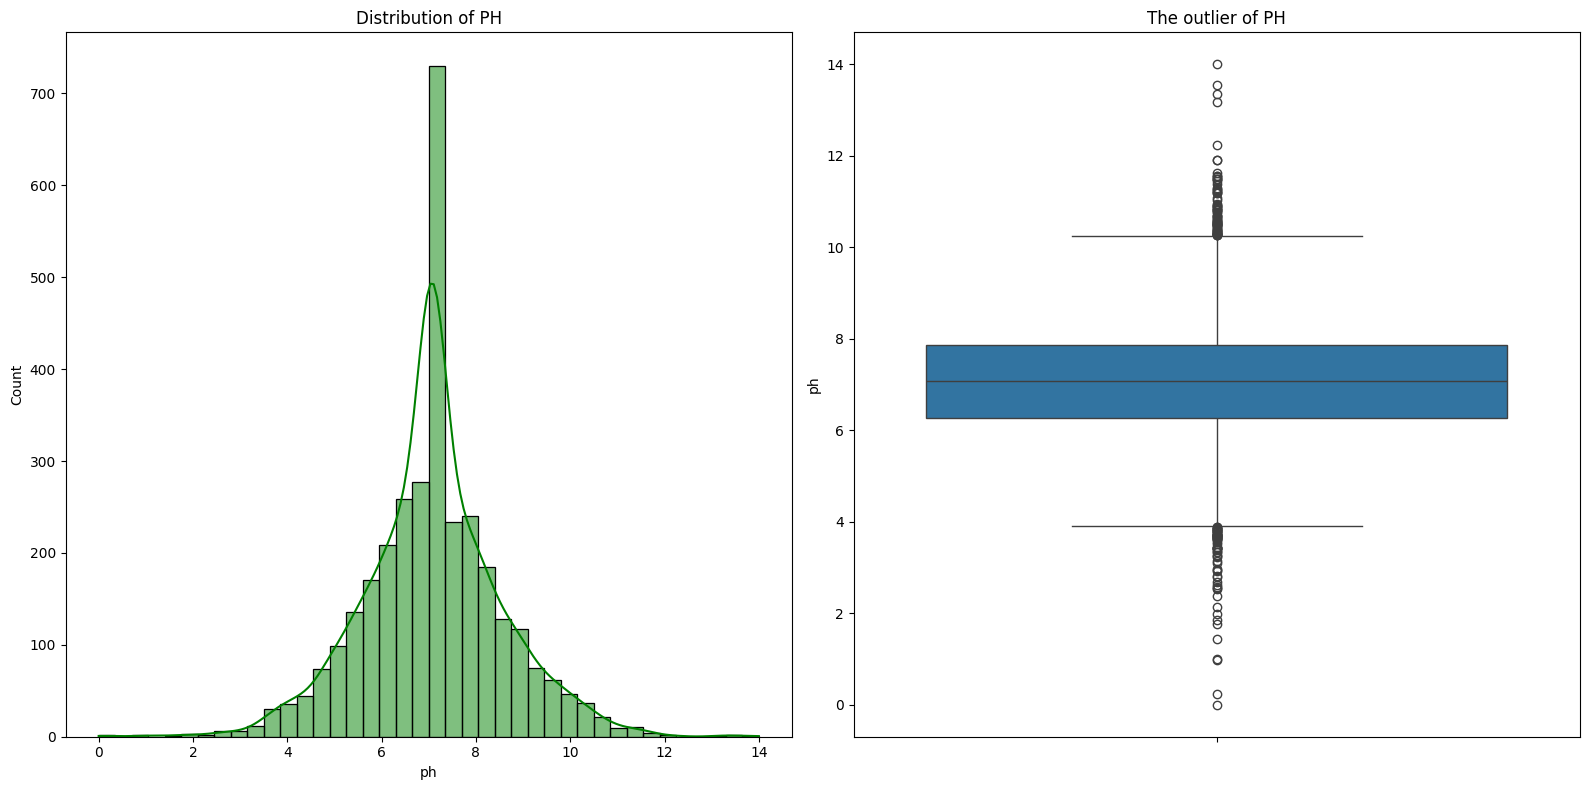

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.histplot(df['ph'], bins=40, kde=True, color='green', label='PH', ax=ax1)
ax1.set_title('Distribution of PH')
sns.boxplot(df['ph'], ax=ax2)
ax2.set_title('The outlier of PH')
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

### Analyze sulfate column

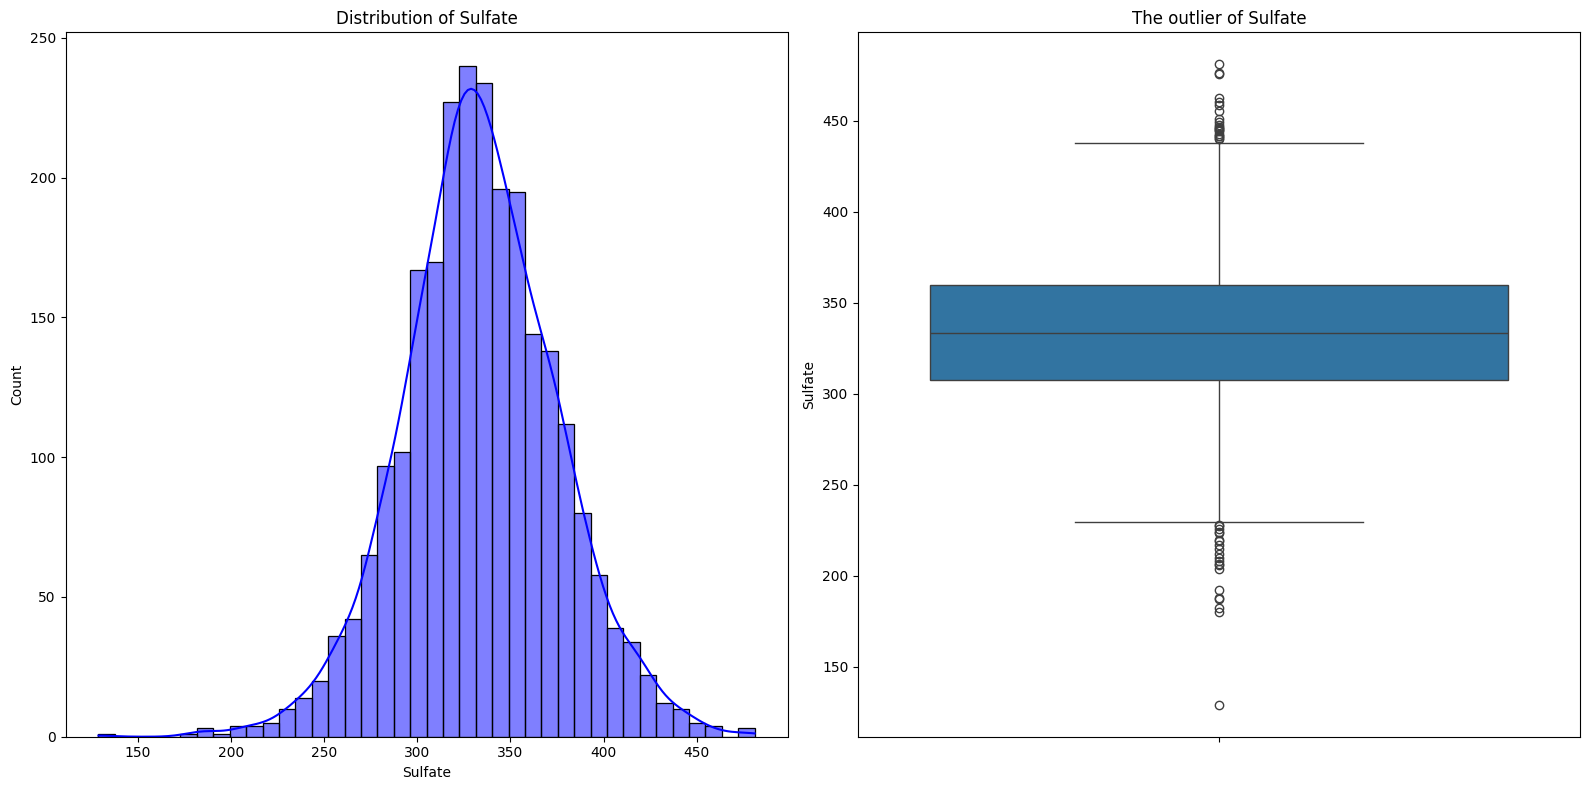

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.histplot(df['Sulfate'], bins=40, kde=True, color='blue', label='Sulfate', ax=ax1)
ax1.set_title('Distribution of Sulfate')
sns.boxplot(df['Sulfate'], ax=ax2)
ax2.set_title('The outlier of Sulfate')
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

### Analyze Trihalomethanes column

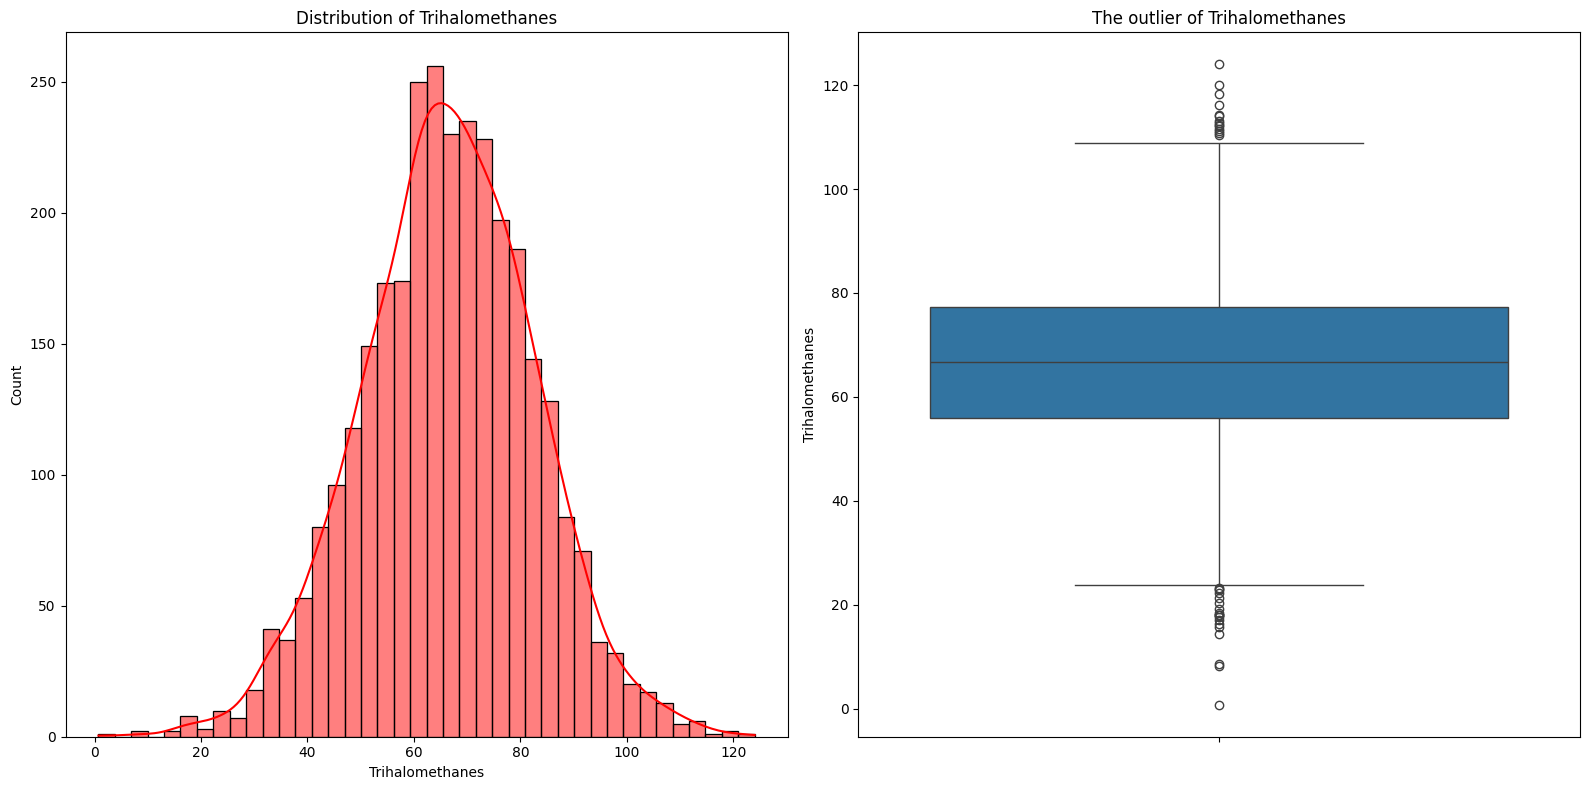

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.histplot(df['Trihalomethanes'], bins=40, kde=True, color='red', label='Trihalomethanes', ax=ax1)
ax1.set_title('Distribution of Trihalomethanes')
sns.boxplot(df['Trihalomethanes'], ax=ax2)
ax2.set_title('The outlier of Trihalomethanes')
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='ph', ylabel='Count'>

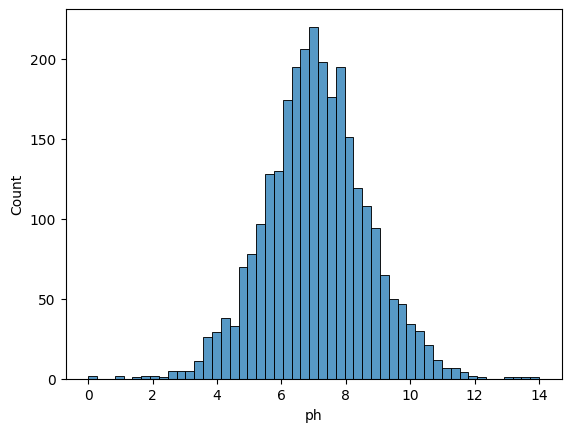

In [9]:
sns.histplot(data = df['ph'])

In [10]:
df['ph'] = df['ph'].fillna(df['ph'].mean())

<Axes: xlabel='Trihalomethanes'>

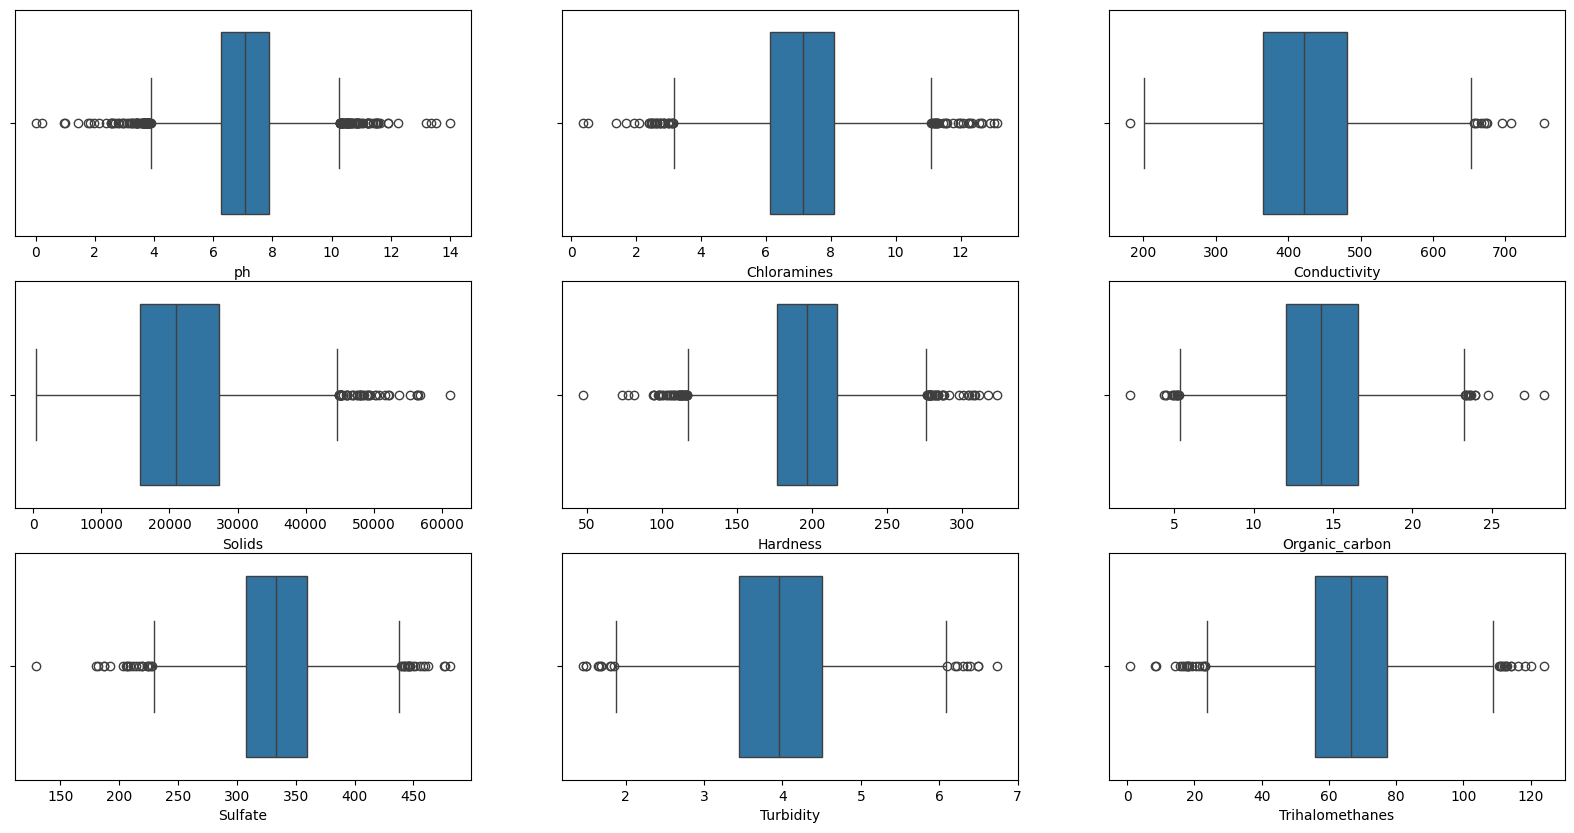

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
sns.boxplot(x = df['ph'], ax = axes[0,0])

sns.boxplot(x = df['Chloramines'], ax = axes[0,1])

sns.boxplot(x = df['Conductivity'], ax = axes[0,2])

sns.boxplot(x = df['Solids'], ax = axes[1,0])

sns.boxplot(x = df['Hardness'], ax = axes[1,1])

sns.boxplot(x = df['Organic_carbon'], ax = axes[1,2])

sns.boxplot(x = df['Sulfate'], ax = axes[2,0])

sns.boxplot(x = df['Turbidity'], ax = axes[2,1])

sns.boxplot(x = df['Trihalomethanes'], ax = axes[2,2])



In [12]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.016608,0.017192,0.040061,0.003089,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.016608,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003089,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [13]:
df.skew(axis = 1, skipna = True) 

0       3.157229
1       2.994587
2       2.997357
3       3.159711
4       3.158423
          ...   
3271    3.161418
3272    2.825491
3273    2.999054
3274    2.993026
3275    2.997817
Length: 3276, dtype: float64

In [14]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
df_scaler

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.69975313, 0.28609102,
        0.        ],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.4509993 , 0.57679264,
        0.        ],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.5328657 , 0.30363656,
        0.        ],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.56065454, 0.34956996,
        1.        ],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.62265916, 0.61611996,
        1.        ],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.63247754, 0.16244074,
        1.        ]])

In [16]:
data = pd.read_csv('water_potability.csv')
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,NaN,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298,-0.799775
1,-2.110818,-2.036414,-0.385987,-0.307694,NaN,2.062575,0.270597,-0.622493,0.684218,-0.799775
2,0.638838,0.847665,-0.240047,1.360594,NaN,-0.094032,0.781117,0.001472,-1.167365,-0.799775
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412,-0.799775
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786,-0.799775
...,...,...,...,...,...,...,...,...,...,...
3271,-1.513577,-0.081758,2.916188,0.028027,0.632063,1.240155,-0.118075,0.018018,0.601124,1.250352
3272,0.456742,-0.085667,-0.534295,0.593290,NaN,-0.417706,1.698560,NaN,-1.497627,1.250352
3273,1.467169,-0.626829,1.270810,0.144017,NaN,0.072263,-0.981329,0.213271,-0.856007,1.250352
3274,-1.225841,1.041355,-1.144058,-0.517373,NaN,-0.288597,-0.942064,0.685854,0.950797,1.250352


In [27]:
from scipy.stats import ttest_ind
column1 = df['ph']
column2 = df['Solids']
statistic, p_value = ttest_ind(column1, column2)
print("Ttest_indResult(statistic={}, pvalue={})".format(statistic, p_value))
if p_value < 0.05:
    print("We reject the null hypothesis at 5% significance level.")
else:
    print("We do not reject the null hypothesis at 5% significance level.")



Ttest_indResult(statistic=-143.64952725440097, pvalue=0.0)
We reject the null hypothesis at 5% significance level.
